Importing the Dependencies

In [1]:
import numpy as np  # type: ignore
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
from sklearn.cluster import KMeans # type: ignore
from sklearn.preprocessing import LabelEncoder # type: ignore

Data Collection & Analysis

In [2]:
# loading the data from csv file to a Pandas DataFrame
customer_data = pd.read_csv('customers.csv')

In [3]:
customer_data.fillna(customer_data.mean(), inplace=True)

In [4]:
print("Missing values after handling:")
print(customer_data.isnull().sum())


Missing values after handling:
Age                     0
Purchase Frequency      0
Average Amount Spent    0
Spending Score          0
dtype: int64


In [5]:
X = customer_data[['Age', 'Average Amount Spent', 'Spending Score']].values 

In [6]:
print("Any NaN values in X:", np.isnan(X).any())


Any NaN values in X: False


In [7]:
# first 5 rows in the dataframe
customer_data.tail()

,Age,Purchase Frequency,Average Amount Spent,Spending Score
223,70,5,46356.0,231780.0
224,56,8,15957.0,127656.0
225,27,7,77777.0,544439.0
226,49,2,6000.0,12000.0
227,49,4,40000.0,160000.0


In [8]:
# finding the number of rows and columns
customer_data.shape

(228, 4)

In [9]:
# getting some informations about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   228 non-null    int64  
 1   Purchase Frequency    228 non-null    int64  
 2   Average Amount Spent  228 non-null    float64
 3   Spending Score        228 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 7.2 KB


In [10]:
# checking for missing values
customer_data.isnull().sum()

Age                     0
Purchase Frequency      0
Average Amount Spent    0
Spending Score          0
dtype: int64

Choosing the Annual Income Column & Spending Score column

In [11]:
print(X)

[[5.50000e+01 2.46370e+04 7.39110e+01]
 [6.50000e+01 7.68480e+04 2.30544e+02]
 [8.00000e+01 3.00000e+04 1.80000e+02]
 [4.80000e+01 4.34310e+04 1.30293e+02]
 [2.50000e+01 2.50000e+04 8.00000e+01]
 [3.20000e+01 1.50000e+04 5.00000e+01]
 [1.80000e+01 1.80000e+04 6.00000e+01]
 [4.00000e+01 5.00000e+04 9.50000e+01]
 [2.70000e+01 3.00000e+04 8.50000e+01]
 [2.20000e+01 2.00000e+04 7.00000e+01]
 [3.50000e+01 2.20000e+04 6.50000e+01]
 [3.00000e+01 1.50000e+04 4.50000e+01]
 [1.90000e+01 1.70000e+04 5.50000e+01]
 [5.00000e+01 4.00000e+04 9.00000e+01]
 [7.60000e+01 4.30000e+04 4.30000e+01]
 [7.60000e+01 4.30000e+04 5.40000e+01]
 [4.30000e+01 8.80000e+04 8.80000e+01]
 [5.60000e+01 6.00000e+03 3.00000e+01]
 [6.70000e+01 5.73560e+04 1.72068e+05]
 [2.00000e+01 2.00000e+04 4.00000e+04]
 [4.80000e+01 5.74730e+04 2.87365e+05]
 [2.40000e+01 3.58680e+04 2.15208e+05]
 [2.10000e+01 2.50000e+04 7.50000e+04]
 [2.50000e+01 1.50000e+04 6.05000e+01]
 [3.00000e+01 2.50000e+04 8.00000e+01]
 [3.50000e+01 3.00000e+04

Choosing the number of clusters

In [12]:
customer_data.fillna(customer_data.mean(), inplace=True)

WCSS  ->  Within Clusters Sum of Squares

In [13]:
X = customer_data[['Age', 'Average Amount Spent', 'Spending Score']].values

In [14]:
# finding wcss value for different number of clusters

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
 


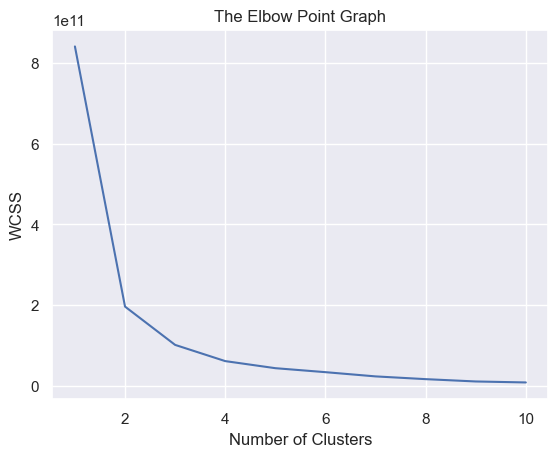

In [15]:
# plot an elbow graph

sns.set()
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


Optimum Number of Clusters = 5

Training the k-Means Clustering Model

In [16]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
Y = kmeans.fit_predict(X)

5 Clusters -  0, 1, 2, 3, 4

Visualizing all the Clusters

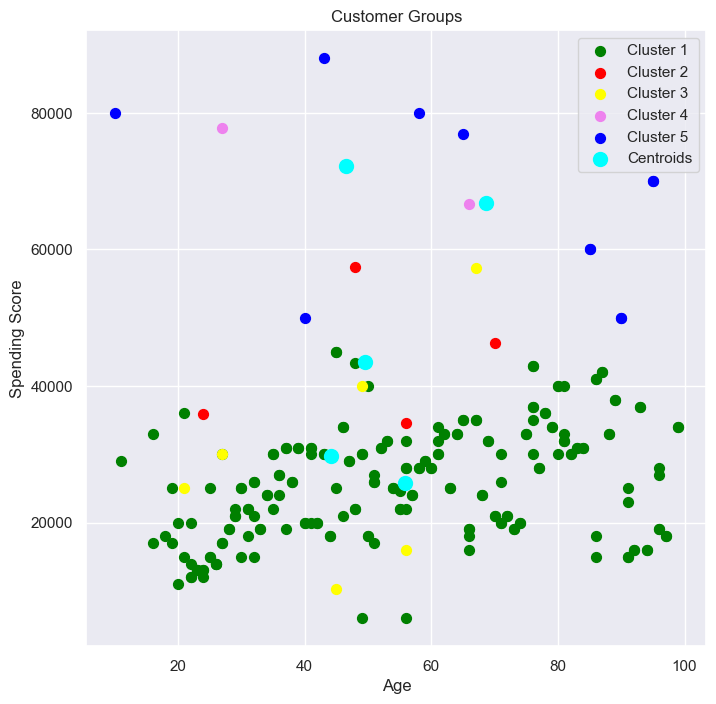

In [17]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y == 2, 0], X[Y == 2, 1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y == 3, 0], X[Y == 3, 1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y == 4, 0], X[Y == 4, 1], s=50, c='blue', label='Cluster 5')

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.show()